In [1]:
import pandas as pd
import json
import os
import matplotlib.pyplot as plt
import numpy as np

In [29]:

%matplotlib notebook
sureal_json_file = './sureal_output/sureal_dark_MLE_withref/sureal.json'
with open(sureal_json_file) as f:
    sureal_data = json.load(f)
observer_bias = sureal_data['observer_bias']
observer_inconsistency= sureal_data['observer_inconsistency']
quality_scores =  np.asarray(sureal_data['quality_scores'])
quality_scores_ci95 = np.asarray(sureal_data['quality_scores_ci95'][0])

orig_score_json = 'fall21_dark_ambience_data_withref.json'
with open(orig_score_json) as f:
    orig_score_data = json.load(f)
vids = [v['path'][:-4] for v in orig_score_data['dis_videos']]
dmos_list= []
for dis_index,v in enumerate(vids):
    content = v.split('_')[2]
    ref_video = '4k_ref_'+content
    ref_index = vids.index(ref_video)
    
    dmos = quality_scores[ref_index] - quality_scores[dis_index] 
    dmos_list.append(dmos)

df_dict = {'video':vids,'dark_mos':quality_scores,'dark_mos_ci95':quality_scores_ci95,\
          'dark_dmos':dmos_list}

df = pd.DataFrame.from_dict(df_dict)
df.to_csv('sureal_dark_mos_and_dmos.csv')

In [2]:
score_df = pd.read_csv('sureal_MLE_CO_scores.csv')
video_names = list(score_df['video_names'])
dark_scores = score_df['dark_scores']
# dark_scores[video_names.index('540p_2.2M_Bonfire.yuv')]

FileNotFoundError: [Errno 2] No such file or directory: 'sureal_MLE_CO_scores.csv'

<IPython.core.display.Javascript object>


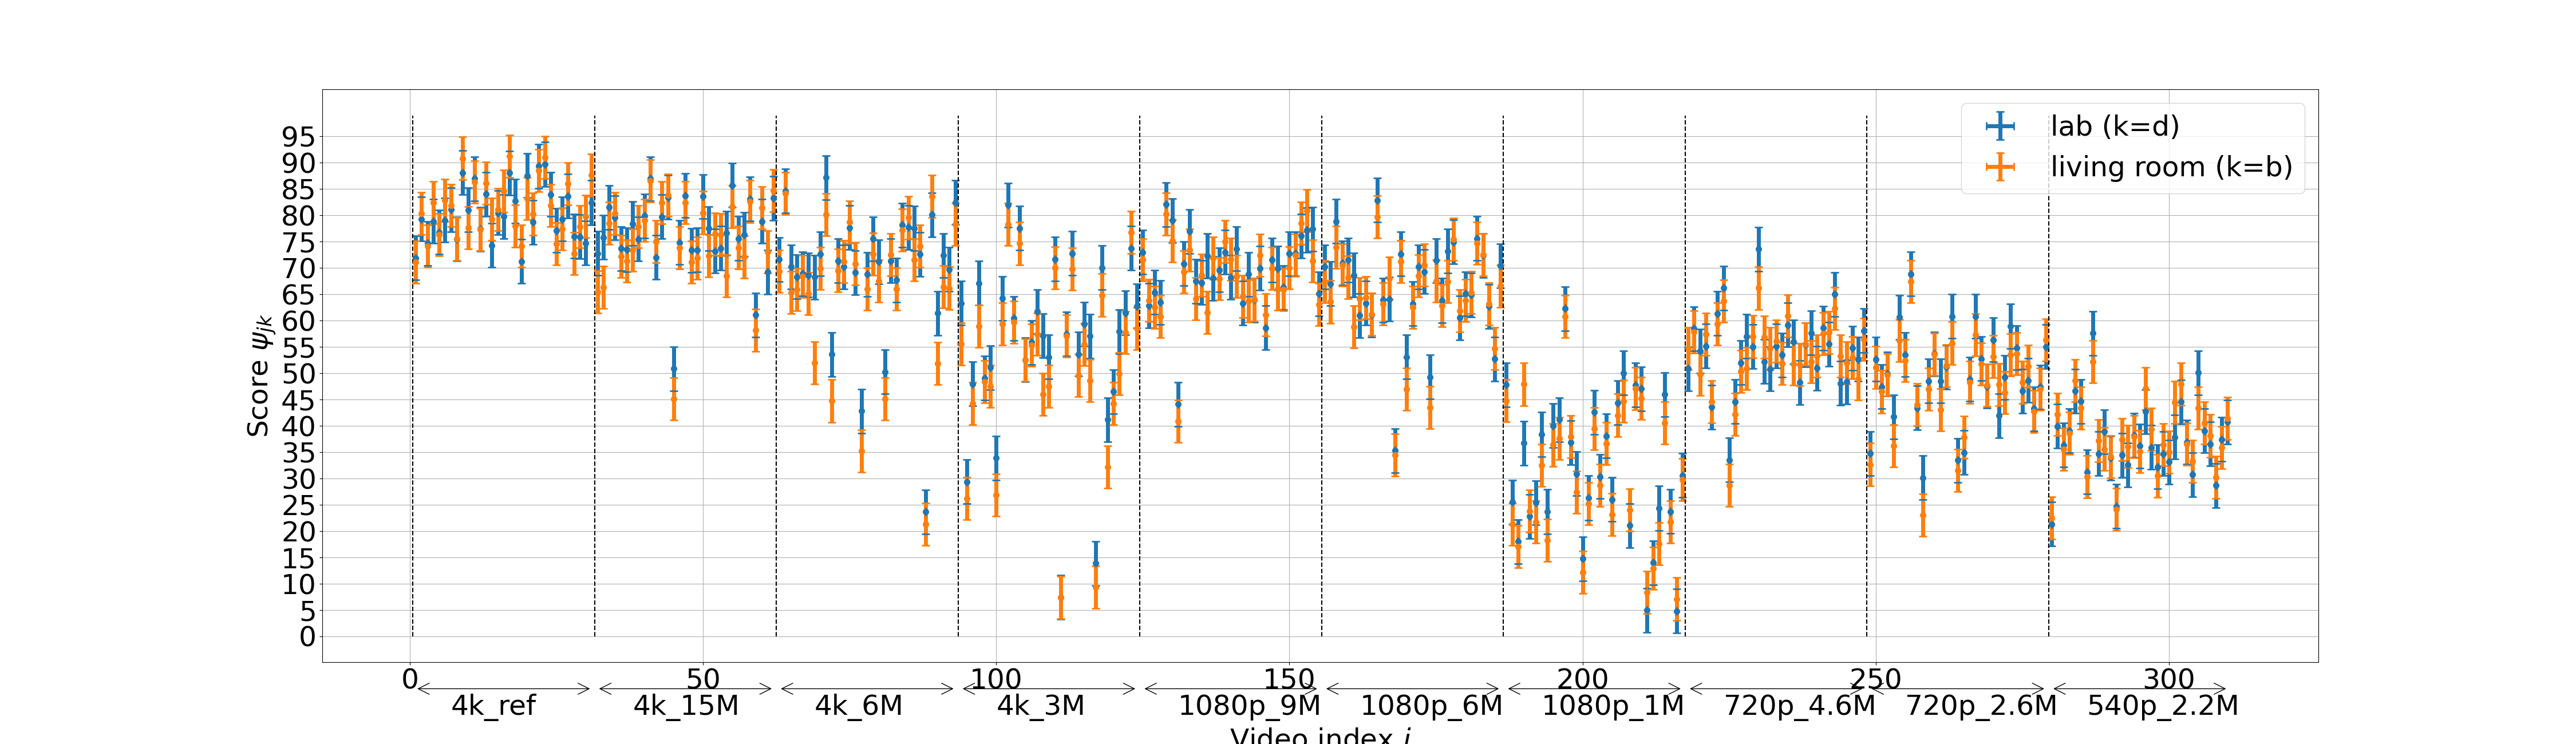

In [77]:
%matplotlib notebook
sureal_json_file = './sureal_output/sureal_dark_MLE_CO_withref/sureal.json'
with open(sureal_json_file) as f:
    sureal_data = json.load(f)
observer_bias = sureal_data['observer_bias']
observer_inconsistency= sureal_data['observer_inconsistency']
quality_scores =  sureal_data['quality_scores']
quality_scores_ci95 = sureal_data['quality_scores_ci95']

score_df = pd.read_csv('sureal_MLE_CO_scores.csv')
video_names = list(score_df['video_names'])
dark_scores = score_df['dark_scores']


sureal_json_file = './sureal_output/sureal_bright_MLE_CO_withref/sureal.json'
with open(sureal_json_file) as f:
    sureal_data = json.load(f)
bobserver_bias = sureal_data['observer_bias']
bobserver_inconsistency= sureal_data['observer_inconsistency']
bquality_scores = sureal_data['quality_scores']
bquality_scores_ci95 = sureal_data['quality_scores_ci95']

my_own_order = ['540p_2.2M','720p_2.6M','720p_4.6M','1080p_1M','1080p_6M','1080p_9M',\
               '4k_3M','4k_6M','4k_15M','4k_ref']
my_own_order.reverse()
order = {key: i for i, key in enumerate(my_own_order)}

zipped_lists = list(zip(video_names,quality_scores, bquality_scores))
sorted_pairs = sorted(zipped_lists, key=lambda d: order[d[0].split('_')[0]+'_'+d[0].split('_')[1]]) 
# print(zipped_lists[0])
tuples = zip(*sorted_pairs)
video_names,quality_scores, bquality_scores = [ list(tuple) for tuple in  tuples]
video_names,quality_scores, bquality_scores
plt.figure(figsize=(45,13))
plt.rcParams.update({'font.size': 35})


plt.errorbar(range(1,1+len(quality_scores)),quality_scores,xerr=0, yerr=quality_scores_ci95,fmt='o',markeredgewidth=2,elinewidth=5, capsize=5,label='lab (k=d)')
plt.errorbar(range(1,1+len(bquality_scores)),bquality_scores,xerr=0, yerr=bquality_scores_ci95,fmt='o',markeredgewidth=2,elinewidth=5, capsize=5,label='living room (k=b)')


for index,o in enumerate(my_own_order):
    plt.plot([index*31+1-0.5]*100,np.arange(100),'k--')
    plt.annotate('', xy=(index*31+1, -10),xytext=((index+1)*31,-10),                     #draws an arrow from one set of coordinates to the other
                arrowprops=dict(arrowstyle='<->',facecolor='red'),   #sets style of arrow and colour
                annotation_clip=False)                               #This enables the arrow to be outside of the plot

    plt.annotate(o,xy=(index*31+7,-15),xytext=(index*31+7,-15),               #Adds another annotation for the text that you want
                annotation_clip=False)

plt.grid()
plt.xticks(np.arange(0, len(quality_scores), 50))
plt.yticks(np.arange(0, 100, 5.0))

plt.xlabel('Video index $j$',labelpad=40)
plt.ylabel('Score $\psi_{jk}$')
plt.legend()
plt.savefig('./plots/sureal_scores.png', bbox_inches='tight')


<IPython.core.display.Javascript object>


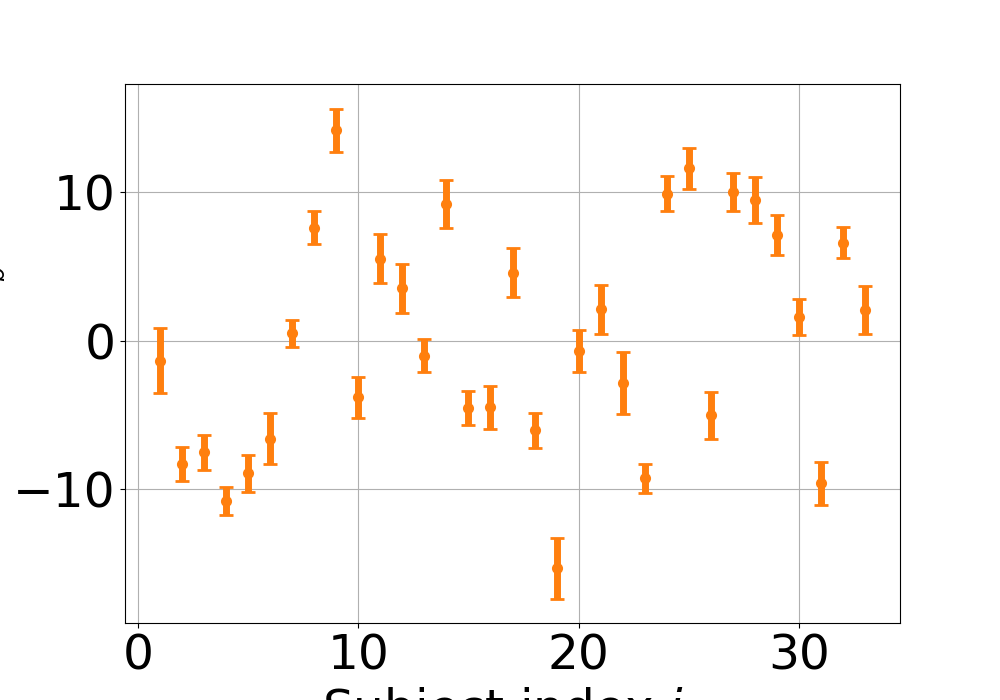

In [73]:
sureal_json_file = './sureal_output/sureal_bright_MLE_CO_withref/sureal.json'
with open(sureal_json_file) as f:
    sureal_data = json.load(f)
bobserver_bias = sureal_data['observer_bias']
bobserver_bias_ci95 = sureal_data['observer_bias_ci95']

bobserver_inconsistency= sureal_data['observer_inconsistency']
bobserver_inconsistency_ci95 = sureal_data['observer_inconsistency_ci95']

sureal_json_file = './sureal_output/sureal_dark_MLE_CO_withref/sureal.json'
with open(sureal_json_file) as f:
    sureal_data = json.load(f)
dobserver_bias = sureal_data['observer_bias']
dobserver_bias_ci95 = sureal_data['observer_bias_ci95']

dobserver_inconsistency= sureal_data['observer_inconsistency']
dobserver_inconsistency_ci95 = sureal_data['observer_inconsistency_ci95']



plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 35})


# p1=plt.errorbar(range(1,1+len(dobserver_bias)),dobserver_bias,xerr=0, yerr=dobserver_bias_ci95,fmt='o', markeredgewidth=2,elinewidth=5, capsize=5,label='lab (k=d)')
p2=plt.errorbar(range(1,1+len(bobserver_bias)),bobserver_bias,xerr=0, yerr=bobserver_bias_ci95,color='#ff7f0e',fmt='o', markeredgewidth=2,elinewidth=5, capsize=5,label='living room (k=b)')
# plt.yticks(np.arange(0, 100, 5.0),fontsize=10)
# plt.xticks(np.arange(0, len(quality_scores), 50),fontsize=10)

plt.grid()
plt.xlabel('Subject index $i_b$')
plt.ylabel('Bias $\Delta_{i_b}$')
# z = plt.legend()
# tm = z.legendHandles

plt.savefig('./plots/livingroom_subject_bias.png', bbox_inches='tight')



<IPython.core.display.Javascript object>


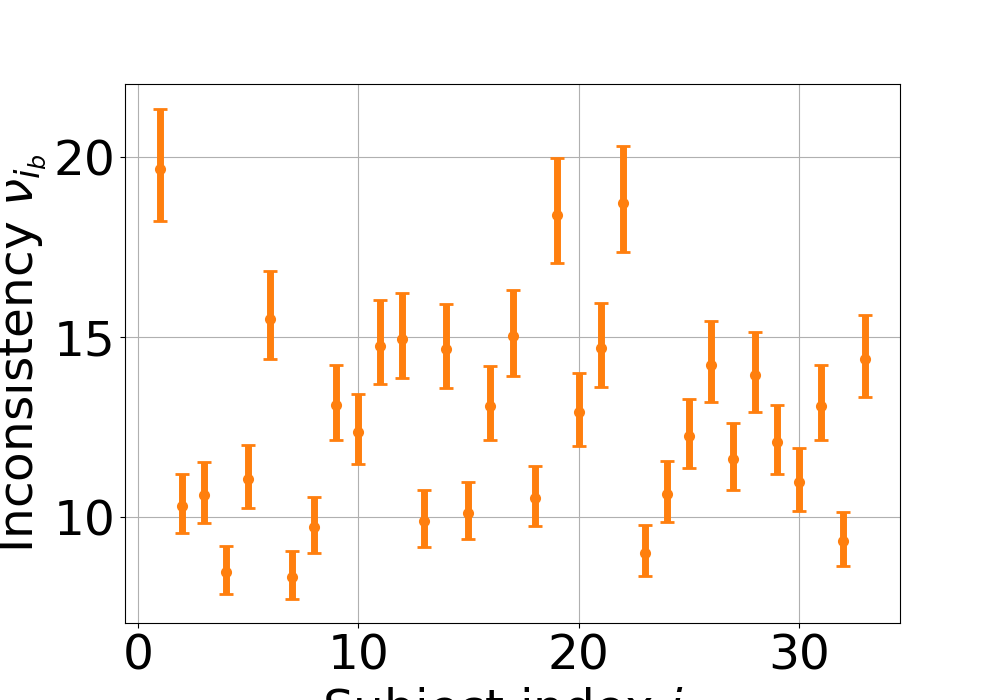

In [75]:

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 35})


# p1=plt.errorbar(range(1,1+len(dobserver_inconsistency)),dobserver_inconsistency,xerr=0, yerr=dobserver_inconsistency_ci95, fmt='o',markeredgewidth=2,elinewidth=5, capsize=5,label='lab (k=d)')
p2=plt.errorbar(range(1,1+len(bobserver_inconsistency)),bobserver_inconsistency,xerr=0,color='#ff7f0e', yerr=bobserver_inconsistency_ci95,fmt='o', markeredgewidth=2,elinewidth=5, capsize=5,label='living room (k=b)')
# plt.yticks(np.arange(0, 100, 5.0),fontsize=10)
# plt.xticks(np.arange(0, len(quality_scores), 50),fontsize=10)

plt.grid()
plt.xlabel('Subject index $i_b$')
plt.ylabel('Inconsistency $\\nu_{i_b}$')
# z = plt.legend()
plt.savefig('./plots/livingroom_subject_inconsistency.png', bbox_inches='tight')


tm = z.legendHandles

In [126]:
columns =['video_names','dark_scores','dark_scores_ci95','bright_scores','bright_scores_ci95',\
                               'dark_observer_bias','bright_observer_bias',\
          'dark_observer_inconsistency','bright_observer_inconsistency']
data = list(map(list,zip(dark_video_names,quality_scores,quality_scores_ci95[0]*len(quality_scores),\
                              bquality_scores,bquality_scores_ci95[0]*len(quality_scores),observer_bias,bobserver_bias,\
                             observer_inconsistency,bobserver_inconsistency)))
# print(data)
data_dict = dict()
data_dict['video_names']=dark_video_names
data_dict['dark_scores']=quality_scores
data_dict['dark_scores_ci95']=[quality_scores_ci95[0][0]]*len(quality_scores)
data_dict['bright_scores']=bquality_scores
data_dict['bright_scores_ci95']=[bquality_scores_ci95[0][0]]*len(quality_scores)
observer_dict = dict()
observer_dict['dark_observer_bias']=observer_bias
observer_dict['bright_observer_bias']=bobserver_bias
observer_dict['dark_observer_inconsistency']=observer_inconsistency
observer_dict['bright_observer_inconsistency']=bobserver_inconsistency

for k, v in data_dict.items():
    print(k,len(v))


video_names 310
dark_scores 310
dark_scores_ci95 310
bright_scores 310
bright_scores_ci95 310


In [127]:
score_df = pd.DataFrame(data_dict)
score_df.to_csv('sureal_MLE_CO_scores.csv')
observer_df = pd.DataFrame(observer_dict)
observer_df.to_csv('sureal_MLE_CO_observers.csv')

<IPython.core.display.Javascript object>


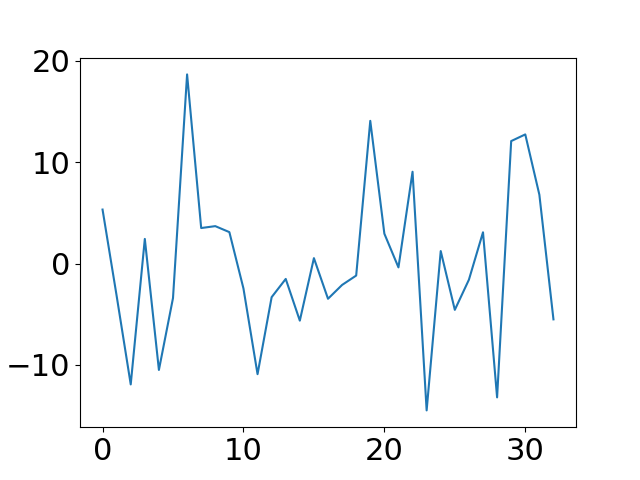

In [76]:
plt.figure()
plt.scatter(observer_bias)

<IPython.core.display.Javascript object>


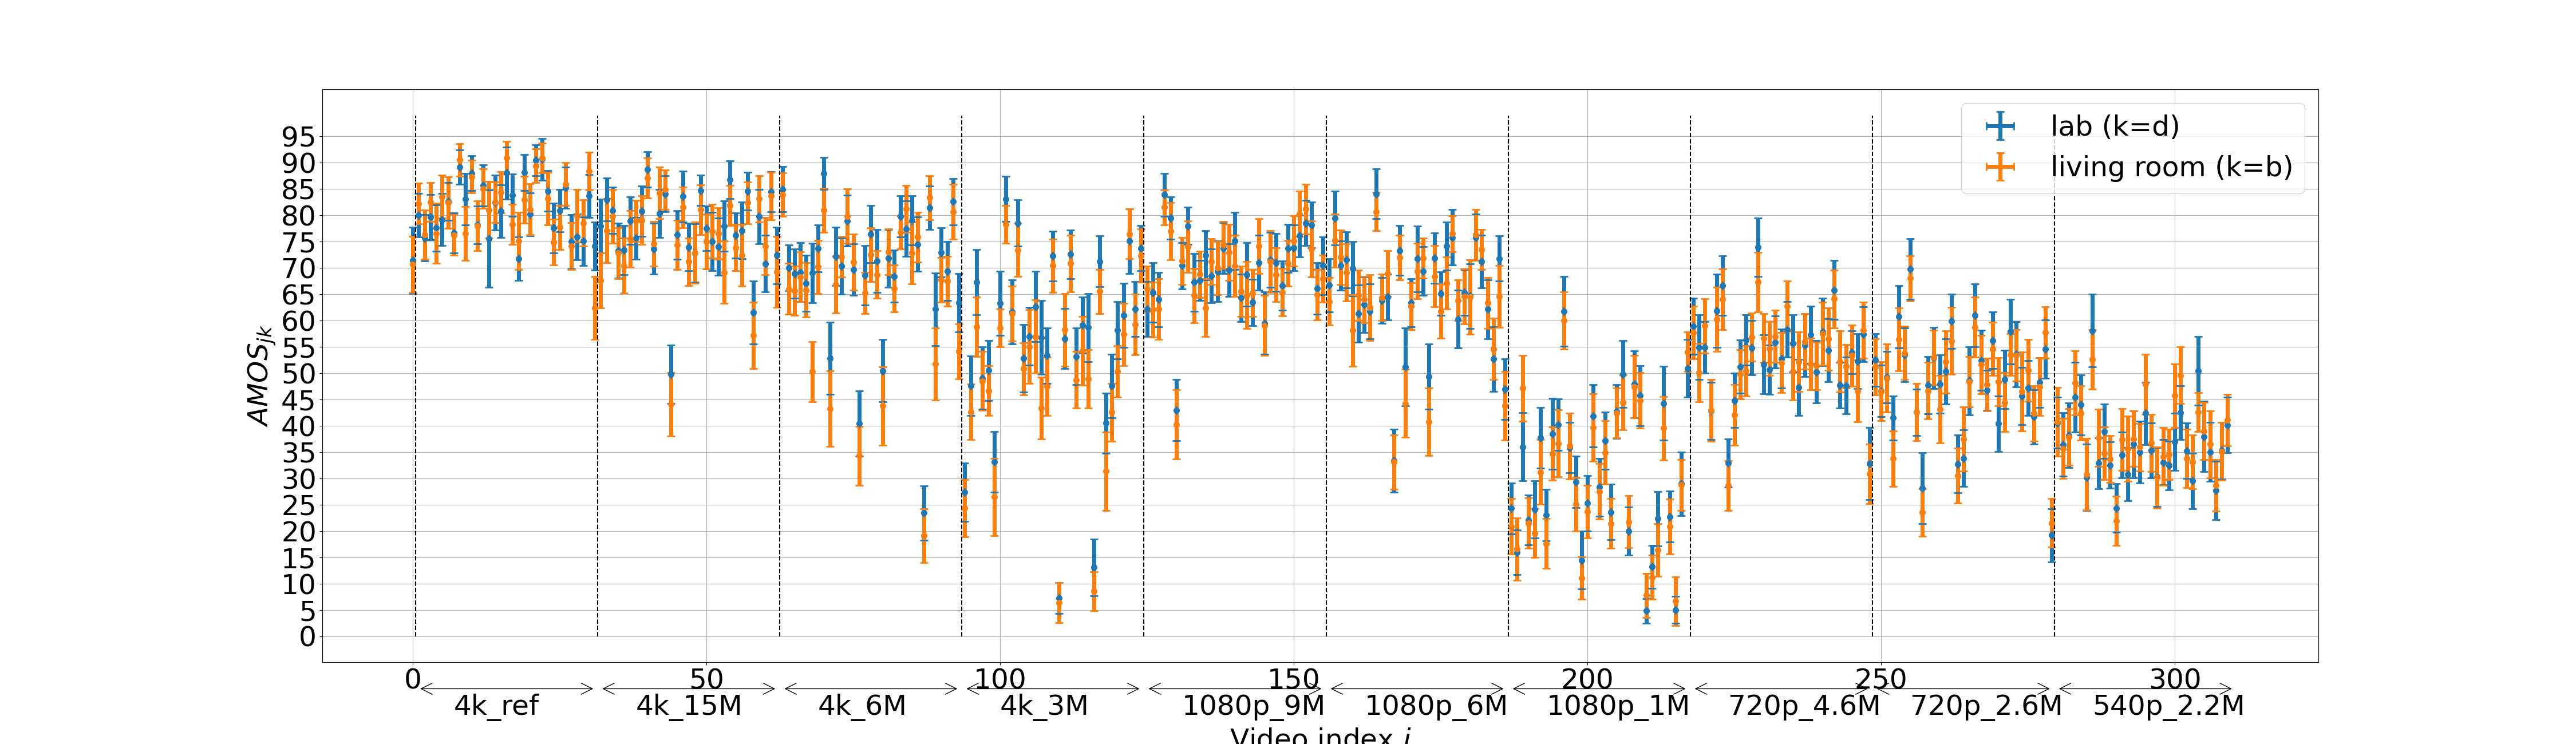

In [76]:
import scipy.stats as st
from ast import literal_eval


fall21_data = './fall21_data.csv'
fall21_data_df = pd.read_csv(fall21_data)
dquality_scores_list = [literal_eval(x) for x in fall21_data_df['dark_score_list']]
bquality_scores_list = [literal_eval(x) for x in fall21_data_df['bright_score_list']]
video_names = fall21_data_df['video']
dquality_scores = fall21_data_df['dark_mos']
bquality_scores= fall21_data_df['bright_mos']
dci95_d,dci95_u = st.norm.interval(alpha=0.95, loc=np.mean(dquality_scores_list,axis=1), scale=st.sem(dquality_scores_list,axis=1))
bci95_d,bci95_u = st.norm.interval(alpha=0.95, loc=np.mean(bquality_scores_list,axis=1), scale=st.sem(bquality_scores_list,axis=1))

zipped_lists = zip(video_names,dquality_scores, bquality_scores,bci95_d,bci95_u,dci95_d,dci95_u)
my_own_order = ['540p_2.2M','720p_2.6M','720p_4.6M','1080p_1M','1080p_6M','1080p_9M',\
               '4k_3M','4k_6M','4k_15M','4k_ref']
my_own_order.reverse()
order = {key: i for i, key in enumerate(my_own_order)}

sorted_pairs = sorted(zipped_lists, key=lambda d: order[d[0].split('_')[0]+'_'+d[0].split('_')[1]]) 

tuples = zip(*sorted_pairs)
video_names,dquality_scores, bquality_scores,bci95_d,bci95_u,dci95_d,dci95_u = [np.asarray(x) for x in [ list(tuple) for tuple in  tuples]]


bci = np.asarray([bquality_scores-bci95_d,bci95_u-bquality_scores])
dci = np.asarray([dquality_scores-dci95_d,dci95_u-dquality_scores])


plt.figure(figsize=(45,13))
plt.rcParams.update({'font.size': 35})


plt.errorbar(range(len(dquality_scores)),dquality_scores,xerr=0, yerr=dci,fmt='o',markeredgewidth=2,elinewidth=5, capsize=5, label='lab (k=d)')
plt.errorbar(range(len(bquality_scores)),bquality_scores,xerr=0, yerr=bci,fmt='o',markeredgewidth=2,elinewidth=5, capsize=5, label='living room (k=b)')
for index,o in enumerate(my_own_order):
    plt.plot([index*31+1-0.5]*100,np.arange(100),'k--')
    plt.annotate('', xy=(index*31+1, -10),xytext=((index+1)*31,-10),                     #draws an arrow from one set of coordinates to the other
                arrowprops=dict(arrowstyle='<->',facecolor='red'),   #sets style of arrow and colour
                annotation_clip=False)                               #This enables the arrow to be outside of the plot

    plt.annotate(o,xy=(index*31+7,-15),xytext=(index*31+7,-15),               #Adds another annotation for the text that you want
                annotation_clip=False)

plt.grid()
plt.xticks(np.arange(0, len(quality_scores), 50))
plt.yticks(np.arange(0, 100, 5.0))


plt.xlabel('Video index $j$',labelpad=40)
plt.ylabel('$AMOS_{jk}$')
plt.legend()

plt.savefig('./plots/amos_scores.png', bbox_inches='tight')


In [225]:
for index in range(len(dci95_d)):
    if(max(dci95_d[index], bci95_d[index]) > min(dci95_u[index], bci95_u[index])):
        print('no overlap for ', video_names[index])


no overlap for  4k_15M_Light2
no overlap for  4k_15M_NighTraffic
no overlap for  4k_6M_NighTraffic
no overlap for  4k_3M_football6


In [228]:
p_vals = fall21_data_df['welch_p_values']
fall21_data_df.loc[p_vals<0.05,'video']

0                 4k_15M_Light2
1               4k_3M_Daylight1
15           4k_15M_NighTraffic
43            4k_6M_NighTraffic
53            1080p_1M_Chasing1
56          720p_2.6M_football9
63         1080p_6M_NighTraffic
64                4k_6M_Porsche
96         1080p_9M_NighTraffic
139             4k_3M_football6
211              1080p_6M_golf1
218             4k_15M_firework
222    540p_2.2M_CenterPanorama
223                 4k_3M_golf1
233         720p_2.6M_football2
244          540p_2.2M_Chasing3
251             4k_3M_football5
282              4k_6M_firework
Name: video, dtype: object

In [242]:
from scipy.stats import f_oneway

count = 0
for index in range(len(fall21_data_df['dark_score_list'])):
    dark_score_list = literal_eval(fall21_data_df['dark_score_list'].iloc[index])
    bright_score_list = literal_eval(fall21_data_df['bright_score_list'].iloc[index])
    F,p = f_oneway(dark_score_list,bright_score_list)
    welch_p = fall21_data_df['welch_p_values'].iloc[index]
    if(welch_p<0.05):
        video = fall21_data_df['video'].iloc[index]
        print(video)
        count+=1
print(count)

4k_15M_Light2
4k_3M_Daylight1
4k_15M_NighTraffic
4k_6M_NighTraffic
1080p_1M_Chasing1
720p_2.6M_football9
1080p_6M_NighTraffic
4k_6M_Porsche
1080p_9M_NighTraffic
4k_3M_football6
1080p_6M_golf1
4k_15M_firework
540p_2.2M_CenterPanorama
4k_3M_golf1
720p_2.6M_football2
540p_2.2M_Chasing3
4k_3M_football5
4k_6M_firework
18


In [243]:
from scipy.stats import f_oneway

count = 0
for index in range(len(fall21_data_df['dark_score_list'])):
    dark_score_list = literal_eval(fall21_data_df['dark_score_list'].iloc[index])
    bright_score_list = literal_eval(fall21_data_df['bright_score_list'].iloc[index])
    F,p = f_oneway(dark_score_list,bright_score_list)
    welch_p = fall21_data_df['welch_p_values'].iloc[index]
    if(welch_p<0.05):
        video = fall21_data_df['video'].iloc[index]
        print(video)
        count+=1
print(count)

4k_15M_Light2
4k_3M_Daylight1
4k_15M_NighTraffic
4k_6M_NighTraffic
1080p_1M_Chasing1
720p_2.6M_football9
1080p_6M_NighTraffic
4k_6M_Porsche
1080p_9M_NighTraffic
4k_3M_football6
1080p_6M_golf1
4k_15M_firework
540p_2.2M_CenterPanorama
4k_3M_golf1
720p_2.6M_football2
540p_2.2M_Chasing3
4k_3M_football5
4k_6M_firework
18
